In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_26.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

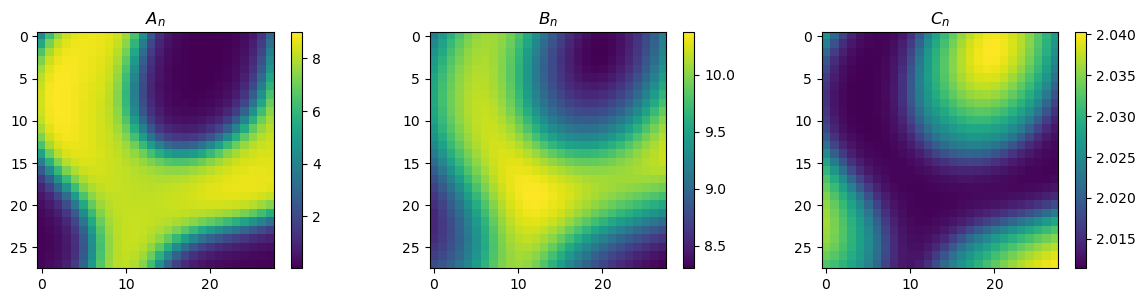

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:17.743235, 
data A loss:6.238710, data B loss:9.434719, data C loss:2.069806, 
Laplacian A loss:77.053789, Laplacian B loss:7.116718
Physics loss:1.750050
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=0.9999, mu_A=0.9000, mu_B=1.0999, K_AA=17.3572, K_AB=17.3572, K_AC=17.3572, K_BA=18.4206, K_BC=18.4206, K_CB=3.5712, K_CC=3.5713


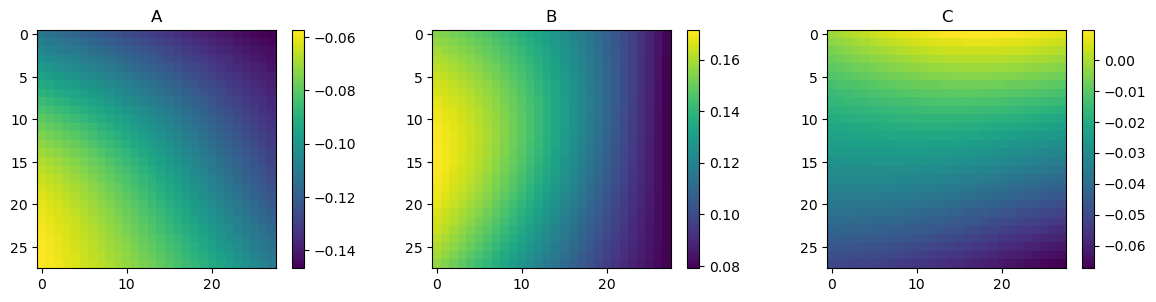

Epoch: 1000 
 data loss:0.875472, 
data A loss:0.234726, data B loss:0.588934, data C loss:0.051812, 
Laplacian A loss:4.827258, Laplacian B loss:7.100683
Physics loss:0.237168
Negative loss:0.015124

 b_A=-0.0228, b_B=1.1386, b_C=0.7090, V_A=9.0900, V_B=2.3407, V_C=2.0742, mu_A=0.9026, mu_B=0.0992, K_AA=4.6644, K_AB=16.8240, K_AC=22.6909, K_BA=22.0124, K_BC=18.5131, K_CB=1.5965, K_CC=3.0782


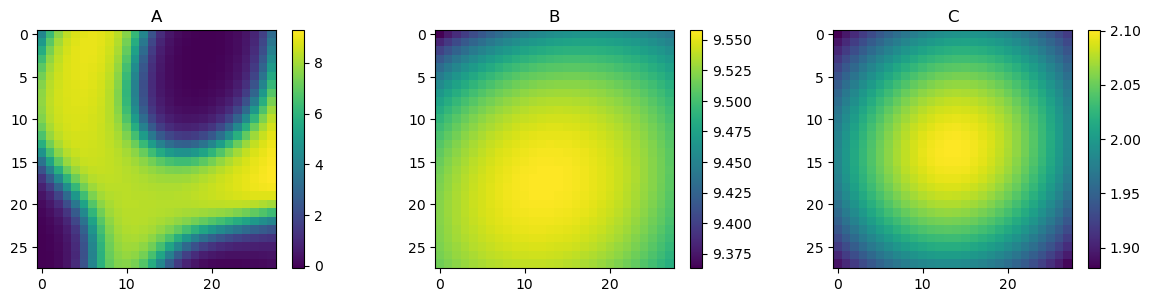

Epoch: 2000 
 data loss:0.763129, 
data A loss:0.117499, data B loss:0.623385, data C loss:0.022245, 
Laplacian A loss:2.277196, Laplacian B loss:6.839122
Physics loss:1.001257
Negative loss:0.007715

 b_A=-0.0278, b_B=18.8746, b_C=0.7034, V_A=12.2521, V_B=25.7964, V_C=2.1519, mu_A=0.9223, mu_B=1.9479, K_AA=4.6484, K_AB=12.3392, K_AC=24.2272, K_BA=12.0839, K_BC=18.6422, K_CB=1.4725, K_CC=3.0973


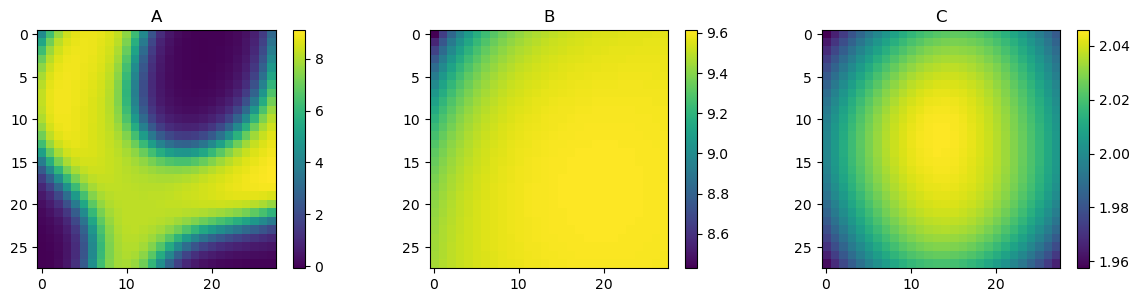

Epoch: 3000 
 data loss:0.515305, 
data A loss:0.096834, data B loss:0.411183, data C loss:0.007288, 
Laplacian A loss:1.574443, Laplacian B loss:5.611216
Physics loss:3.042090
Negative loss:0.013575

 b_A=-0.0483, b_B=30.6575, b_C=0.7644, V_A=13.1823, V_B=38.1897, V_C=2.0046, mu_A=0.9103, mu_B=3.3701, K_AA=4.8047, K_AB=10.2308, K_AC=25.1329, K_BA=11.7350, K_BC=19.0437, K_CB=2.1638, K_CC=3.2424


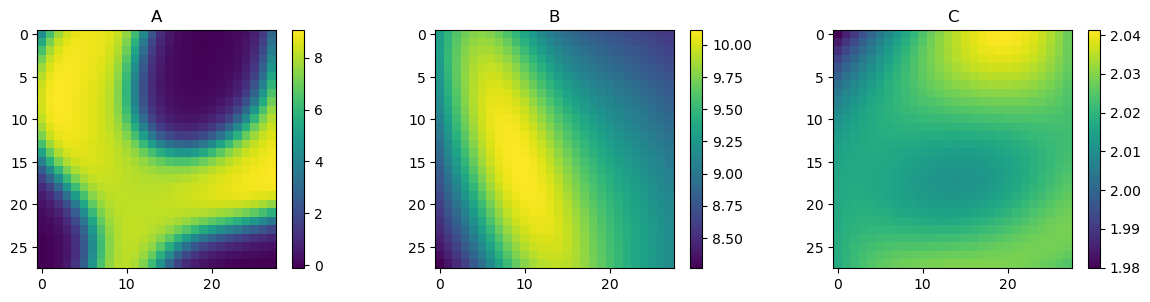

Epoch: 4000 
 data loss:0.156967, 
data A loss:0.083061, data B loss:0.069198, data C loss:0.004708, 
Laplacian A loss:1.202547, Laplacian B loss:0.988899
Physics loss:0.905616
Negative loss:0.013178

 b_A=-0.0770, b_B=-0.0091, b_C=0.8859, V_A=16.2028, V_B=39.3834, V_C=1.5161, mu_A=0.8563, mu_B=0.9146, K_AA=5.0373, K_AB=5.1089, K_AC=25.5217, K_BA=10.3677, K_BC=20.0634, K_CB=1.9725, K_CC=3.6375


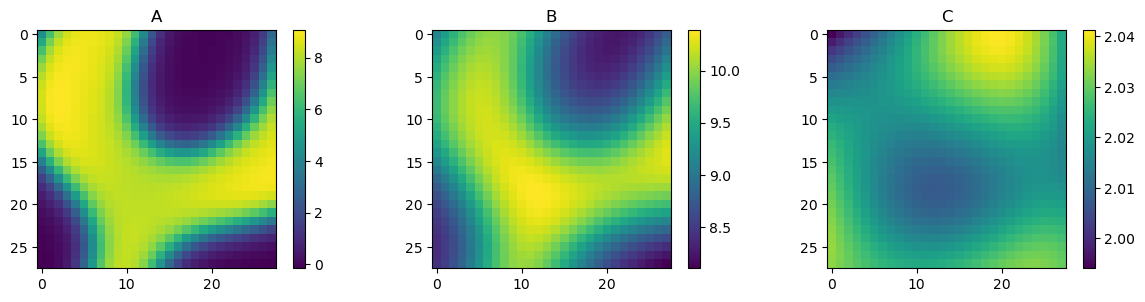

Epoch: 5000 
 data loss:0.105702, 
data A loss:0.072006, data B loss:0.029738, data C loss:0.003957, 
Laplacian A loss:1.008294, Laplacian B loss:0.571756
Physics loss:0.597119
Negative loss:0.010598

 b_A=-0.0633, b_B=-0.0028, b_C=0.8797, V_A=18.0230, V_B=38.6580, V_C=1.5639, mu_A=0.8519, mu_B=0.9711, K_AA=5.0542, K_AB=4.9893, K_AC=25.5964, K_BA=9.8407, K_BC=20.1382, K_CB=2.0068, K_CC=3.6209


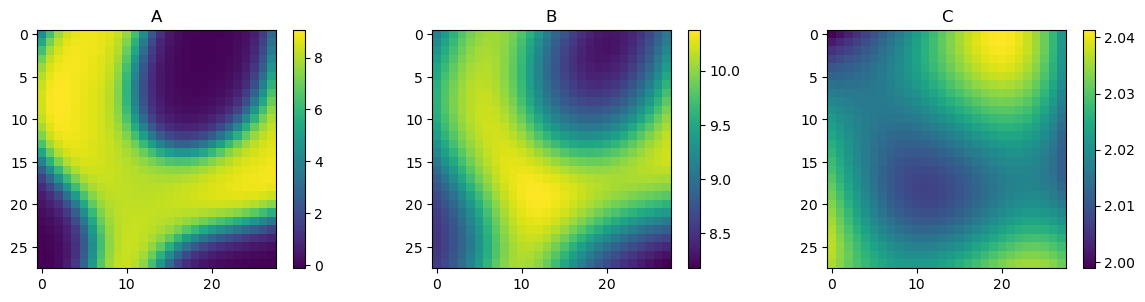

Epoch: 6000 
 data loss:0.087663, 
data A loss:0.062259, data B loss:0.021977, data C loss:0.003427, 
Laplacian A loss:0.811984, Laplacian B loss:0.425327
Physics loss:0.466731
Negative loss:0.007890

 b_A=-0.0688, b_B=-0.0044, b_C=0.8870, V_A=18.3034, V_B=37.9841, V_C=1.6471, mu_A=0.8586, mu_B=0.9767, K_AA=5.0640, K_AB=4.9945, K_AC=25.6373, K_BA=9.7607, K_BC=20.1179, K_CB=2.0277, K_CC=3.7304


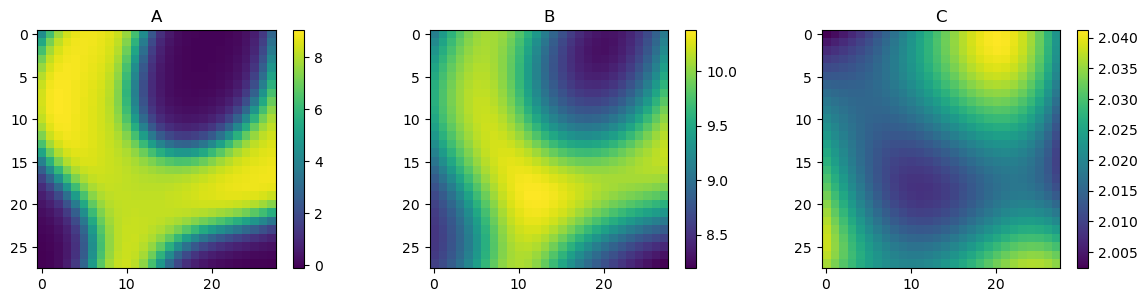

Epoch: 7000 
 data loss:0.072970, 
data A loss:0.054197, data B loss:0.015878, data C loss:0.002894, 
Laplacian A loss:0.683663, Laplacian B loss:0.315833
Physics loss:0.376532
Negative loss:0.004471

 b_A=-0.0646, b_B=-0.0029, b_C=0.8925, V_A=18.3416, V_B=37.4035, V_C=1.7904, mu_A=0.8575, mu_B=0.9784, K_AA=5.0649, K_AB=4.9994, K_AC=25.6193, K_BA=9.7456, K_BC=19.9498, K_CB=2.0474, K_CC=3.8585


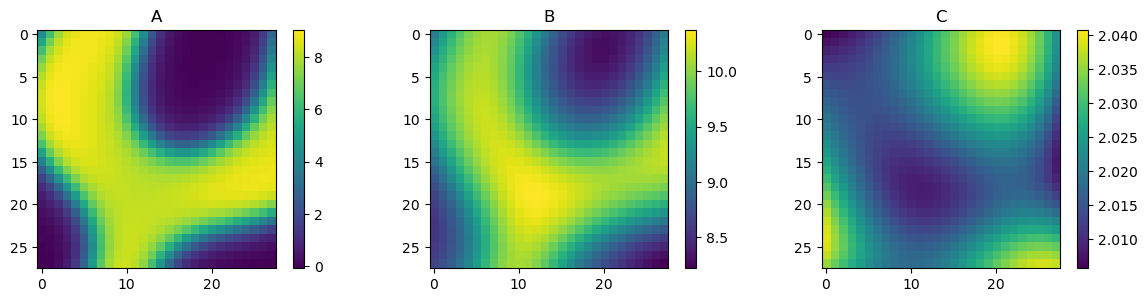

Epoch: 8000 
 data loss:0.061725, 
data A loss:0.048119, data B loss:0.011080, data C loss:0.002526, 
Laplacian A loss:0.599296, Laplacian B loss:0.170536
Physics loss:0.258965
Negative loss:0.001920

 b_A=-0.0659, b_B=0.0014, b_C=0.8955, V_A=18.3864, V_B=36.8152, V_C=1.9180, mu_A=0.8604, mu_B=0.9762, K_AA=5.0710, K_AB=4.9990, K_AC=25.6022, K_BA=9.7202, K_BC=19.7968, K_CB=2.0666, K_CC=3.9369


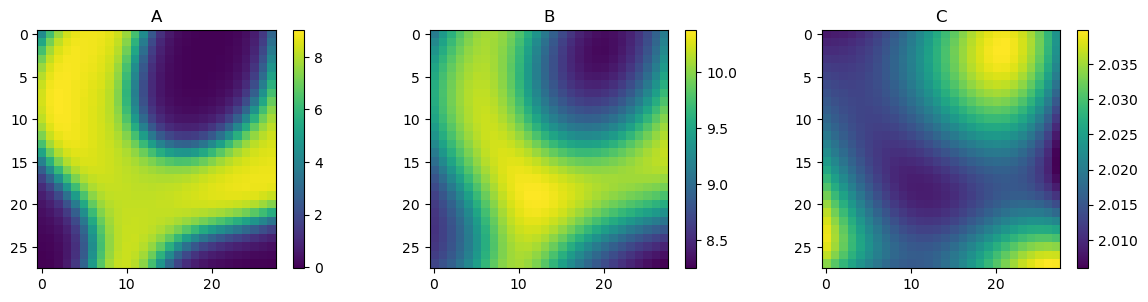

Epoch: 9000 
 data loss:0.055292, 
data A loss:0.044721, data B loss:0.008368, data C loss:0.002203, 
Laplacian A loss:0.495765, Laplacian B loss:0.094154
Physics loss:0.207024
Negative loss:0.001299

 b_A=-0.0599, b_B=-0.0025, b_C=0.8858, V_A=18.4259, V_B=36.2561, V_C=2.0586, mu_A=0.8572, mu_B=0.9773, K_AA=5.0685, K_AB=4.9982, K_AC=25.6022, K_BA=9.7104, K_BC=19.7049, K_CB=2.0799, K_CC=3.9483


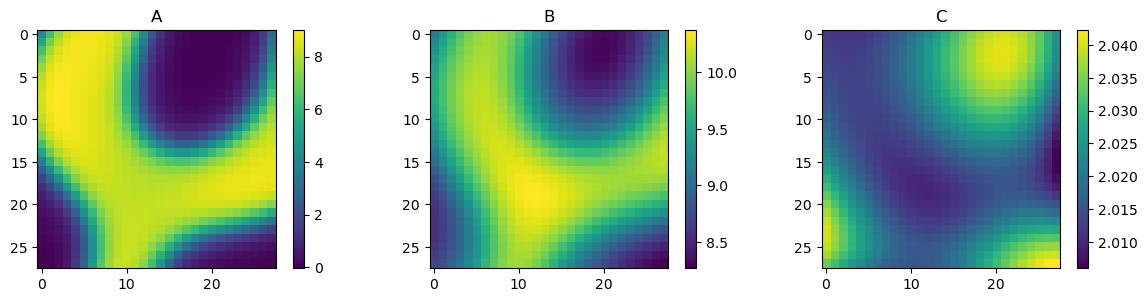

Epoch: 10000 
 data loss:0.052825, 
data A loss:0.043726, data B loss:0.006732, data C loss:0.002367, 
Laplacian A loss:0.688423, Laplacian B loss:0.066144
Physics loss:0.215166
Negative loss:0.001122

 b_A=-0.0535, b_B=0.0032, b_C=0.8855, V_A=18.4574, V_B=35.7355, V_C=2.1666, mu_A=0.8534, mu_B=0.9738, K_AA=5.0651, K_AB=4.9941, K_AC=25.6222, K_BA=9.7041, K_BC=19.6754, K_CB=2.0988, K_CC=3.9782


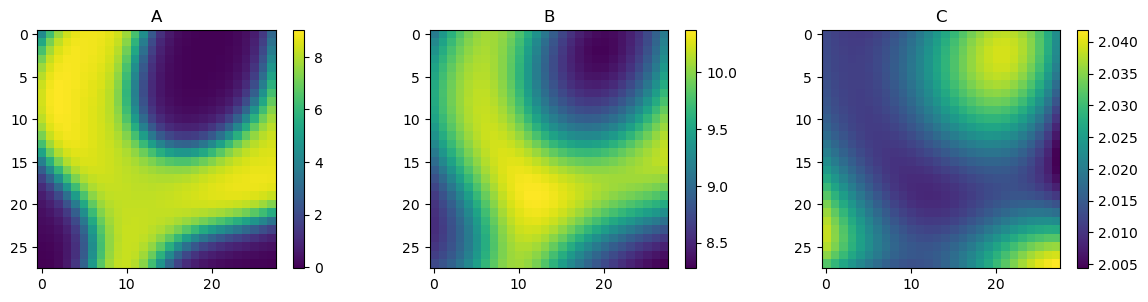

Epoch: 11000 
 data loss:0.049411, 
data A loss:0.041296, data B loss:0.005562, data C loss:0.002553, 
Laplacian A loss:0.393380, Laplacian B loss:0.052263
Physics loss:0.201967
Negative loss:0.000928

 b_A=-0.0566, b_B=0.0015, b_C=0.8847, V_A=18.4663, V_B=35.1938, V_C=2.2678, mu_A=0.8562, mu_B=0.9755, K_AA=5.0681, K_AB=4.9947, K_AC=25.6472, K_BA=9.6957, K_BC=19.6633, K_CB=2.1147, K_CC=4.0233


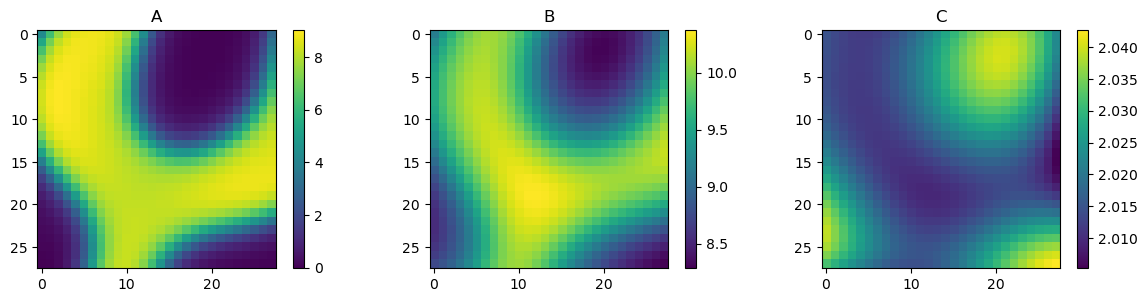

Epoch: 12000 
 data loss:0.047562, 
data A loss:0.040114, data B loss:0.005441, data C loss:0.002007, 
Laplacian A loss:0.371604, Laplacian B loss:0.045604
Physics loss:0.191907
Negative loss:0.000629

 b_A=-0.0479, b_B=0.0003, b_C=0.8835, V_A=18.4746, V_B=34.7017, V_C=2.3563, mu_A=0.8509, mu_B=0.9755, K_AA=5.0645, K_AB=4.9887, K_AC=25.6751, K_BA=9.6922, K_BC=19.6627, K_CB=2.1301, K_CC=4.0563


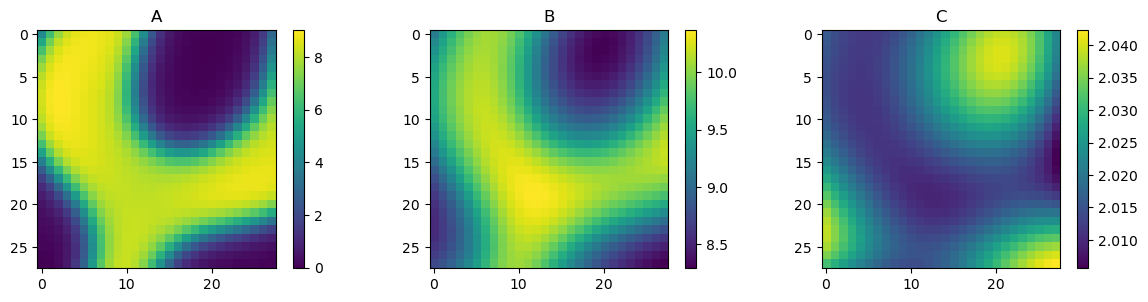

Epoch: 13000 
 data loss:0.051041, 
data A loss:0.043171, data B loss:0.004359, data C loss:0.003510, 
Laplacian A loss:1.061219, Laplacian B loss:0.040647
Physics loss:0.264673
Negative loss:0.000451

 b_A=-0.0477, b_B=0.0107, b_C=0.8861, V_A=18.4989, V_B=34.2556, V_C=2.4444, mu_A=0.8515, mu_B=0.9701, K_AA=5.0640, K_AB=4.9876, K_AC=25.7026, K_BA=9.6892, K_BC=19.6597, K_CB=2.1522, K_CC=4.0878


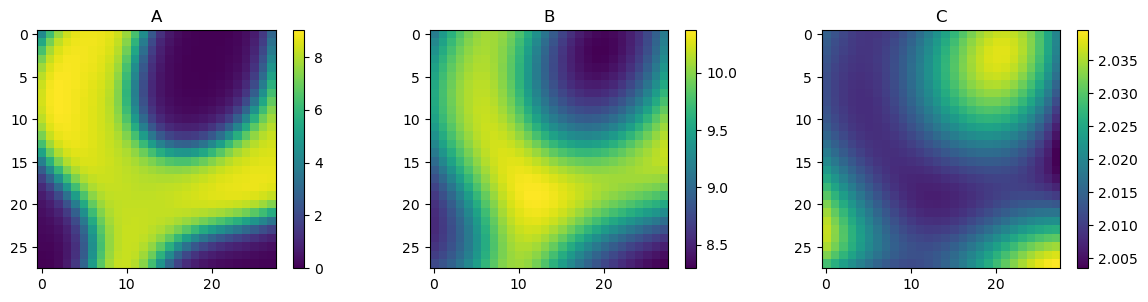

Epoch: 14000 
 data loss:0.043728, 
data A loss:0.038161, data B loss:0.004008, data C loss:0.001558, 
Laplacian A loss:0.302278, Laplacian B loss:0.038060
Physics loss:0.183065
Negative loss:0.000000

 b_A=-0.0497, b_B=-0.0015, b_C=0.8812, V_A=18.5171, V_B=33.7704, V_C=2.5269, mu_A=0.8524, mu_B=0.9760, K_AA=5.0655, K_AB=4.9920, K_AC=25.7292, K_BA=9.6816, K_BC=19.6585, K_CB=2.1631, K_CC=4.1238


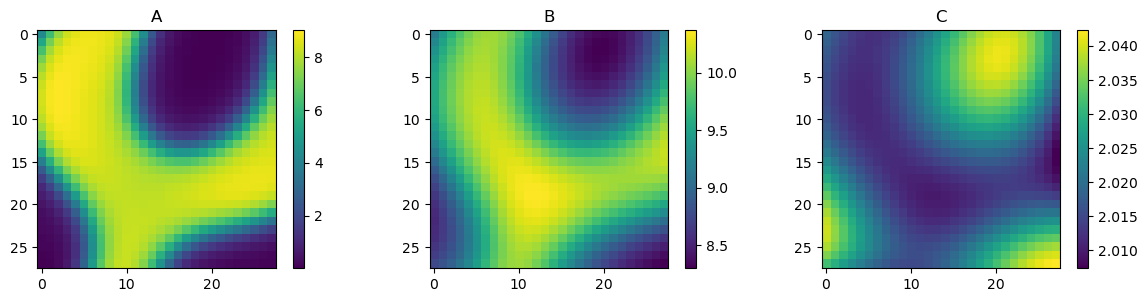

Epoch: 15000 
 data loss:0.042188, 
data A loss:0.037379, data B loss:0.003369, data C loss:0.001440, 
Laplacian A loss:0.276741, Laplacian B loss:0.036087
Physics loss:0.181023
Negative loss:0.000000

 b_A=-0.0505, b_B=-0.0018, b_C=0.8811, V_A=18.5268, V_B=33.2466, V_C=2.6147, mu_A=0.8538, mu_B=0.9763, K_AA=5.0670, K_AB=4.9915, K_AC=25.7552, K_BA=9.6770, K_BC=19.6602, K_CB=2.1827, K_CC=4.1611


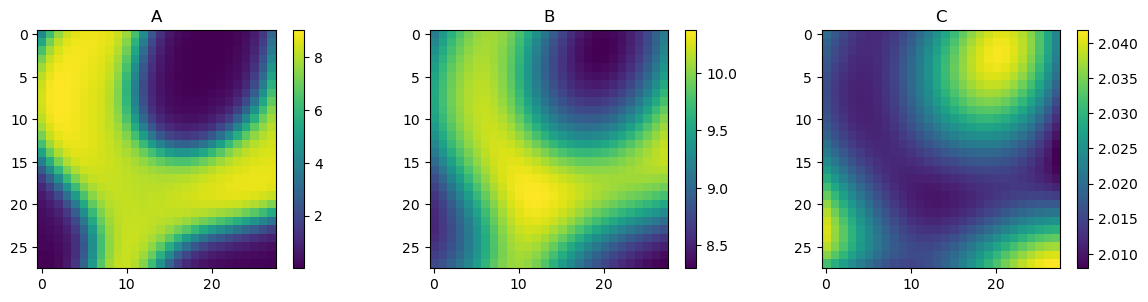

Epoch: 16000 
 data loss:0.041236, 
data A loss:0.036733, data B loss:0.003130, data C loss:0.001373, 
Laplacian A loss:0.271621, Laplacian B loss:0.034633
Physics loss:0.181263
Negative loss:0.000000

 b_A=-0.0505, b_B=-0.0043, b_C=0.8793, V_A=18.5427, V_B=32.8474, V_C=2.6853, mu_A=0.8533, mu_B=0.9775, K_AA=5.0669, K_AB=4.9923, K_AC=25.7799, K_BA=9.6725, K_BC=19.6607, K_CB=2.1972, K_CC=4.1859


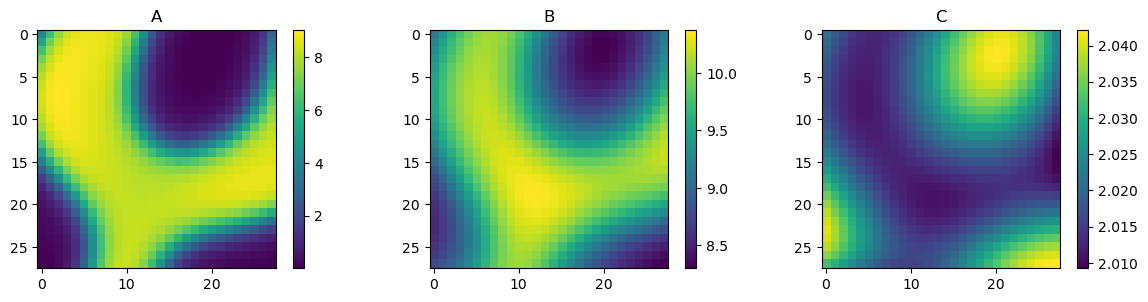

Epoch: 17000 
 data loss:0.043852, 
data A loss:0.037806, data B loss:0.004225, data C loss:0.001820, 
Laplacian A loss:0.663793, Laplacian B loss:0.034884
Physics loss:0.194400
Negative loss:0.000000

 b_A=-0.0428, b_B=0.0049, b_C=0.8829, V_A=18.5540, V_B=32.3465, V_C=2.7732, mu_A=0.8492, mu_B=0.9718, K_AA=5.0633, K_AB=4.9955, K_AC=25.8020, K_BA=9.6736, K_BC=19.6589, K_CB=2.2232, K_CC=4.2165


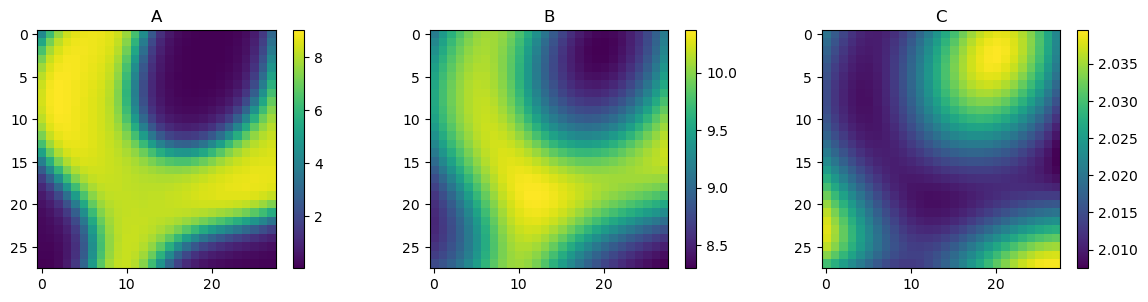

Epoch: 18000 
 data loss:0.039680, 
data A loss:0.035551, data B loss:0.003016, data C loss:0.001113, 
Laplacian A loss:0.254241, Laplacian B loss:0.032496
Physics loss:0.180181
Negative loss:0.000000

 b_A=-0.0484, b_B=-0.0031, b_C=0.8800, V_A=18.5515, V_B=31.8763, V_C=2.8469, mu_A=0.8527, mu_B=0.9767, K_AA=5.0671, K_AB=4.9908, K_AC=25.8224, K_BA=9.6671, K_BC=19.6577, K_CB=2.2388, K_CC=4.2491


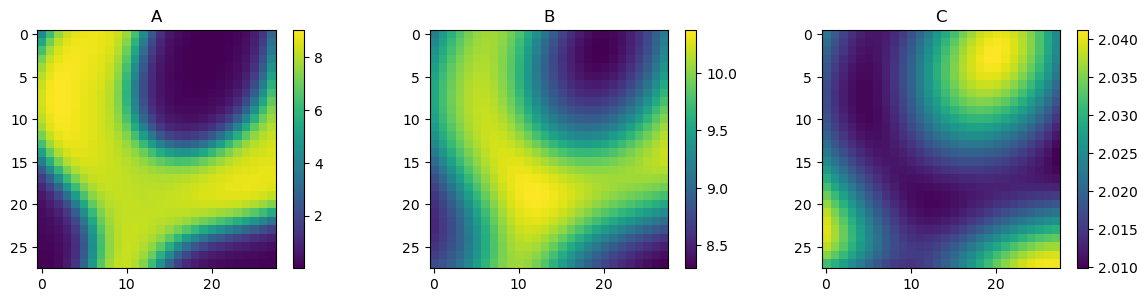

Epoch: 19000 
 data loss:0.040799, 
data A loss:0.035011, data B loss:0.004738, data C loss:0.001051, 
Laplacian A loss:0.232776, Laplacian B loss:0.034989
Physics loss:0.184158
Negative loss:0.000000

 b_A=-0.0579, b_B=-0.0042, b_C=0.8795, V_A=18.5475, V_B=31.4381, V_C=2.9202, mu_A=0.8588, mu_B=0.9776, K_AA=5.0740, K_AB=4.9921, K_AC=25.8405, K_BA=9.6590, K_BC=19.6558, K_CB=2.2583, K_CC=4.2770


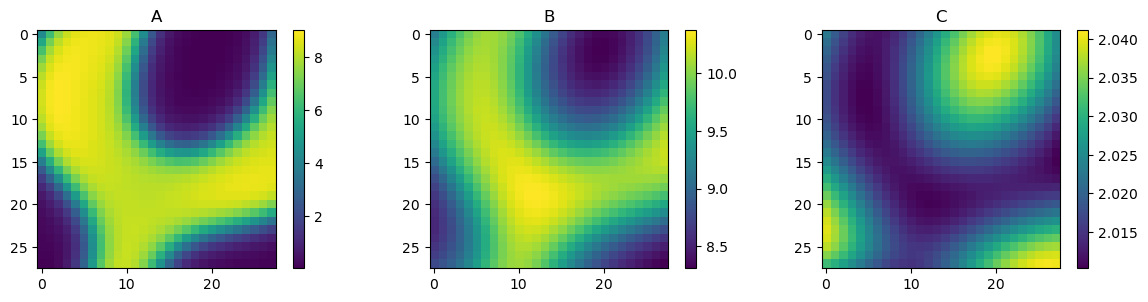

Epoch: 20000 
 data loss:0.038745, 
data A loss:0.034441, data B loss:0.003166, data C loss:0.001138, 
Laplacian A loss:0.202618, Laplacian B loss:0.031041
Physics loss:0.181610
Negative loss:0.000000

 b_A=-0.0464, b_B=-0.0034, b_C=0.8792, V_A=18.5633, V_B=31.0085, V_C=2.9922, mu_A=0.8510, mu_B=0.9767, K_AA=5.0650, K_AB=4.9912, K_AC=25.8576, K_BA=9.6689, K_BC=19.6528, K_CB=2.2792, K_CC=4.3013


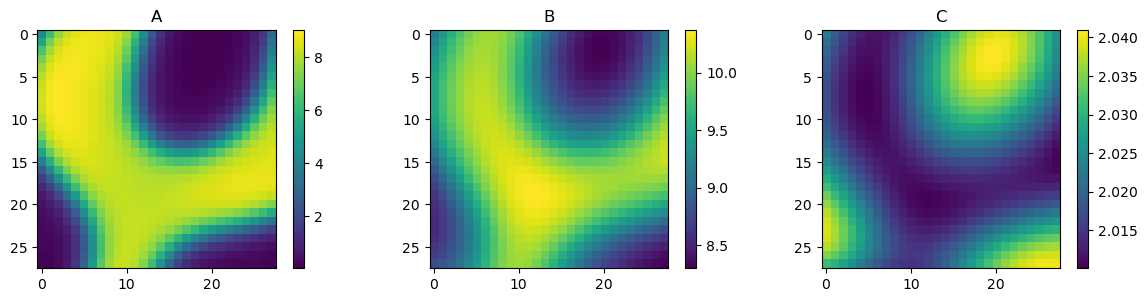

Epoch: 21000 
 data loss:0.042031, 
data A loss:0.034477, data B loss:0.005544, data C loss:0.002009, 
Laplacian A loss:0.463015, Laplacian B loss:0.035162
Physics loss:0.198844
Negative loss:0.000000

 b_A=-0.0555, b_B=0.0041, b_C=0.8851, V_A=18.5527, V_B=30.5714, V_C=3.0661, mu_A=0.8557, mu_B=0.9719, K_AA=5.0711, K_AB=4.9946, K_AC=25.8744, K_BA=9.6627, K_BC=19.6529, K_CB=2.3061, K_CC=4.3229


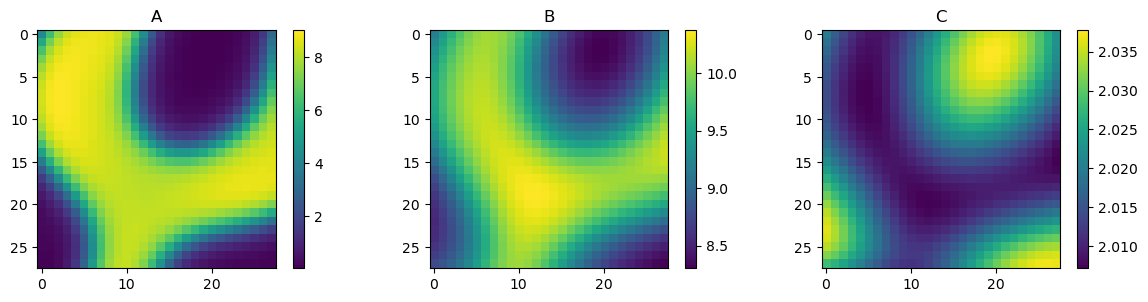

Epoch: 22000 
 data loss:0.041633, 
data A loss:0.033490, data B loss:0.007077, data C loss:0.001066, 
Laplacian A loss:0.180280, Laplacian B loss:0.036145
Physics loss:0.195065
Negative loss:0.000000

 b_A=-0.0370, b_B=-0.0007, b_C=0.8805, V_A=18.5571, V_B=30.1151, V_C=3.1364, mu_A=0.8468, mu_B=0.9755, K_AA=5.0617, K_AB=4.9912, K_AC=25.8902, K_BA=9.6703, K_BC=19.6474, K_CB=2.3261, K_CC=4.3534


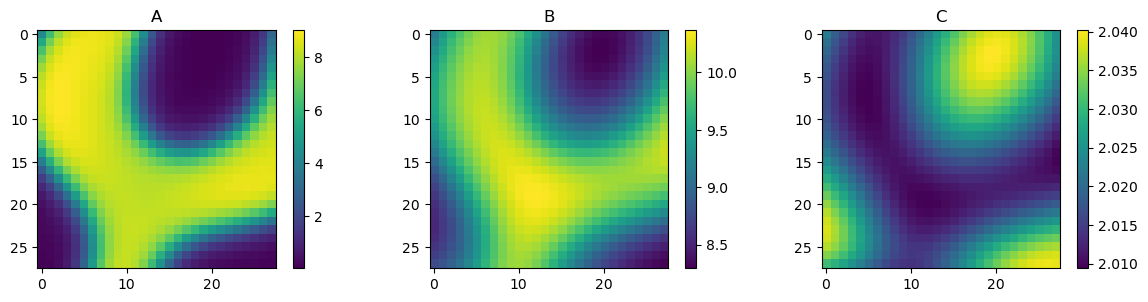

Epoch: 23000 
 data loss:0.036313, 
data A loss:0.033066, data B loss:0.002174, data C loss:0.001073, 
Laplacian A loss:0.171465, Laplacian B loss:0.028568
Physics loss:0.179896
Negative loss:0.000000

 b_A=-0.0475, b_B=-0.0039, b_C=0.8792, V_A=18.5517, V_B=29.6926, V_C=3.2014, mu_A=0.8529, mu_B=0.9771, K_AA=5.0666, K_AB=4.9938, K_AC=25.9069, K_BA=9.6694, K_BC=19.6467, K_CB=2.3479, K_CC=4.3840


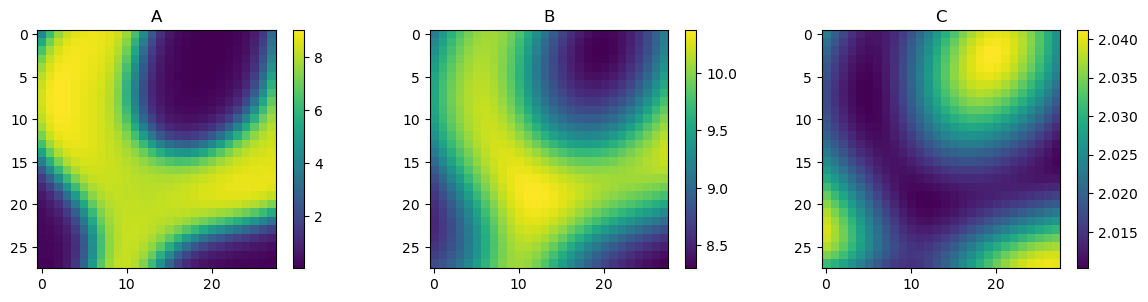

Epoch: 24000 
 data loss:0.035848, 
data A loss:0.032678, data B loss:0.002176, data C loss:0.000994, 
Laplacian A loss:0.167926, Laplacian B loss:0.028067
Physics loss:0.179503
Negative loss:0.000000

 b_A=-0.0485, b_B=-0.0028, b_C=0.8798, V_A=18.5575, V_B=29.2897, V_C=3.2682, mu_A=0.8527, mu_B=0.9764, K_AA=5.0666, K_AB=4.9936, K_AC=25.9214, K_BA=9.6682, K_BC=19.6406, K_CB=2.3719, K_CC=4.4026


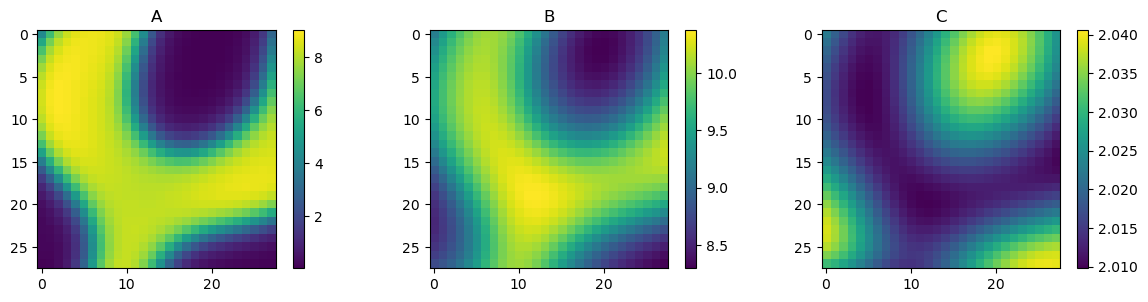

Epoch: 25000 
 data loss:0.040948, 
data A loss:0.034231, data B loss:0.002766, data C loss:0.003951, 
Laplacian A loss:0.600751, Laplacian B loss:0.028012
Physics loss:0.250481
Negative loss:0.000000

 b_A=-0.0458, b_B=-0.0076, b_C=0.8726, V_A=18.5467, V_B=28.8891, V_C=3.3270, mu_A=0.8513, mu_B=0.9852, K_AA=5.0661, K_AB=5.0037, K_AC=25.9374, K_BA=9.6685, K_BC=19.6383, K_CB=2.3889, K_CC=4.4303


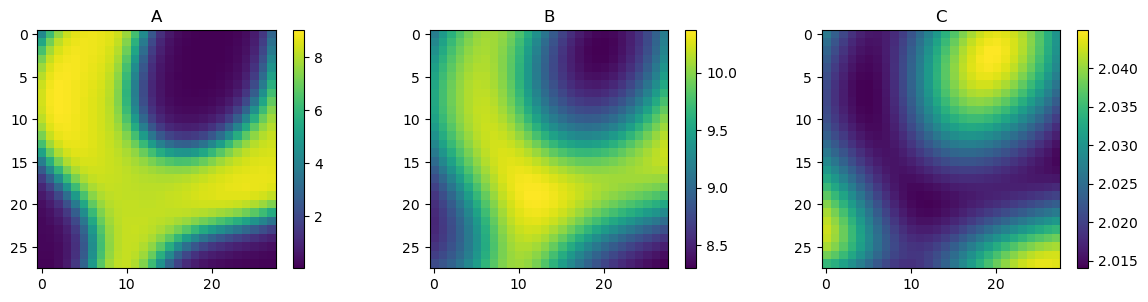

Epoch: 26000 
 data loss:0.034980, 
data A loss:0.032007, data B loss:0.001962, data C loss:0.001011, 
Laplacian A loss:0.157933, Laplacian B loss:0.027132
Physics loss:0.179470
Negative loss:0.000000

 b_A=-0.0488, b_B=-0.0026, b_C=0.8803, V_A=18.5501, V_B=28.4782, V_C=3.3982, mu_A=0.8535, mu_B=0.9761, K_AA=5.0671, K_AB=4.9946, K_AC=25.9529, K_BA=9.6692, K_BC=19.6371, K_CB=2.4234, K_CC=4.4478


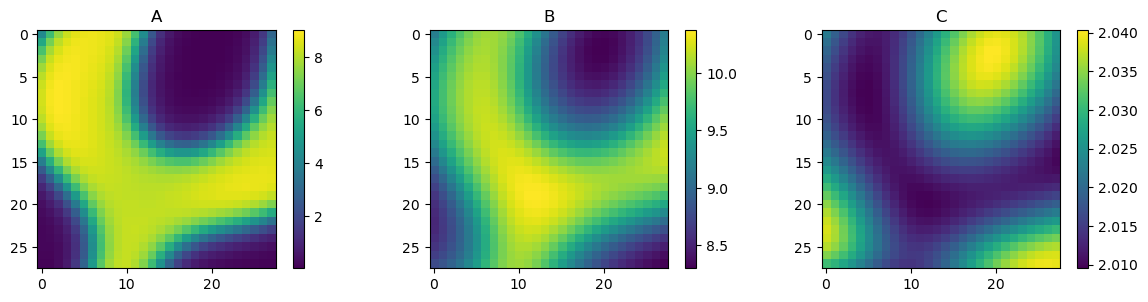

Epoch: 27000 
 data loss:0.036615, 
data A loss:0.032439, data B loss:0.002027, data C loss:0.002149, 
Laplacian A loss:0.426109, Laplacian B loss:0.026933
Physics loss:0.203373
Negative loss:0.000000

 b_A=-0.0507, b_B=-0.0082, b_C=0.8760, V_A=18.5464, V_B=28.1110, V_C=3.4575, mu_A=0.8547, mu_B=0.9818, K_AA=5.0684, K_AB=5.0013, K_AC=25.9680, K_BA=9.6687, K_BC=19.6322, K_CB=2.4426, K_CC=4.4716


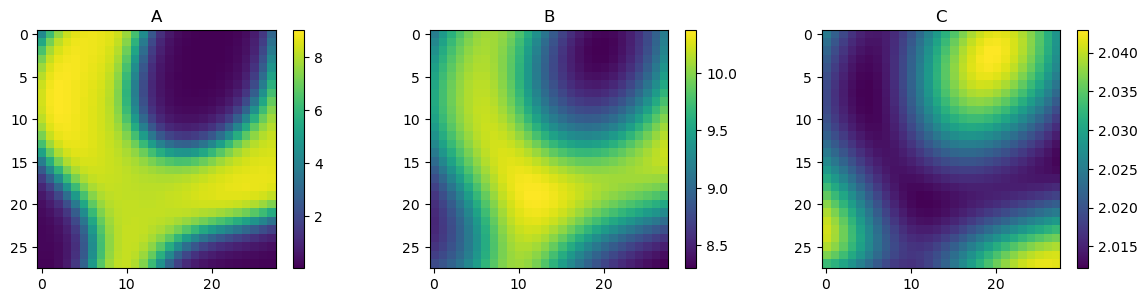

Epoch: 28000 
 data loss:0.043670, 
data A loss:0.032762, data B loss:0.008279, data C loss:0.002630, 
Laplacian A loss:0.537935, Laplacian B loss:0.038678
Physics loss:0.241418
Negative loss:0.000000

 b_A=-0.0650, b_B=-0.0085, b_C=0.8753, V_A=18.5389, V_B=27.7047, V_C=3.5189, mu_A=0.8632, mu_B=0.9838, K_AA=5.0774, K_AB=5.0048, K_AC=25.9837, K_BA=9.6592, K_BC=19.6315, K_CB=2.4704, K_CC=4.4945


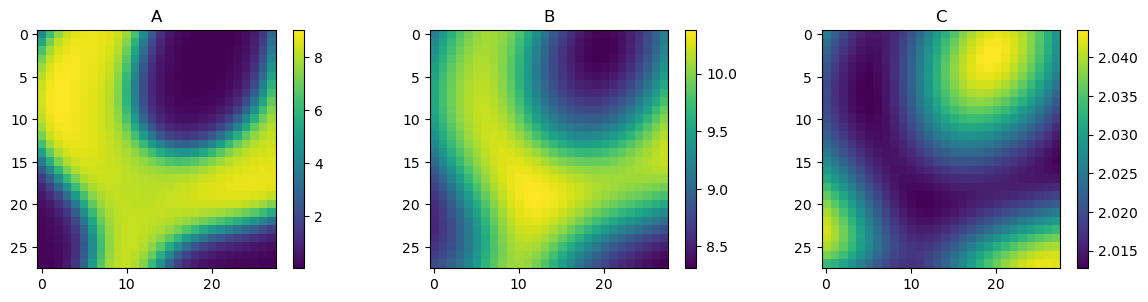

Epoch: 29000 
 data loss:0.034171, 
data A loss:0.031195, data B loss:0.001950, data C loss:0.001025, 
Laplacian A loss:0.181985, Laplacian B loss:0.026213
Physics loss:0.181081
Negative loss:0.000000

 b_A=-0.0500, b_B=-0.0020, b_C=0.8803, V_A=18.5449, V_B=27.2758, V_C=3.5899, mu_A=0.8543, mu_B=0.9760, K_AA=5.0678, K_AB=4.9971, K_AC=25.9986, K_BA=9.6697, K_BC=19.6296, K_CB=2.5099, K_CC=4.5141


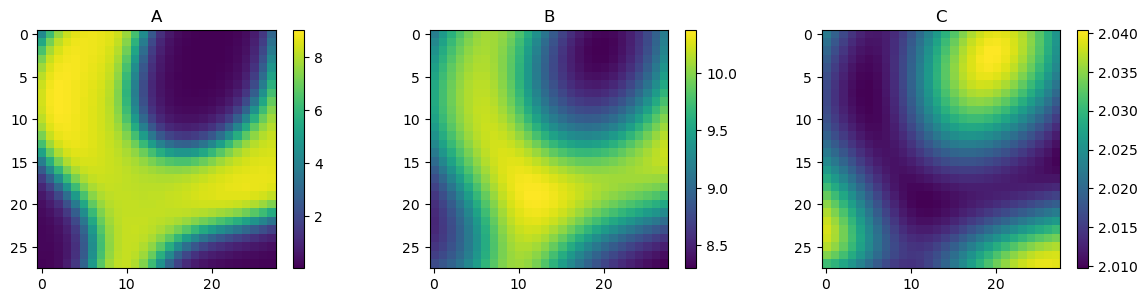

Epoch: 30000 
 data loss:0.033852, 
data A loss:0.031023, data B loss:0.001854, data C loss:0.000974, 
Laplacian A loss:0.133811, Laplacian B loss:0.025744
Physics loss:0.179726
Negative loss:0.000000

 b_A=-0.0488, b_B=-0.0033, b_C=0.8796, V_A=18.5435, V_B=26.9448, V_C=3.6464, mu_A=0.8536, mu_B=0.9764, K_AA=5.0671, K_AB=4.9981, K_AC=26.0136, K_BA=9.6711, K_BC=19.6271, K_CB=2.5364, K_CC=4.5303


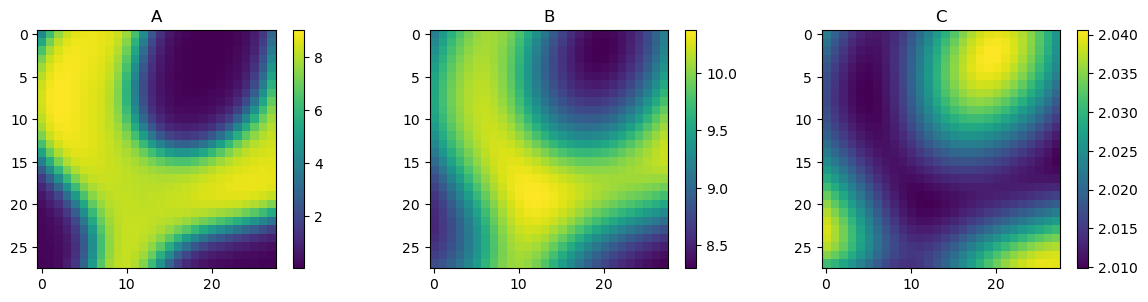

    Early dtoped at 30128
Epoch: 30128 
 data loss:0.033818, 
data A loss:0.030987, data B loss:0.001852, data C loss:0.000979, 
Laplacian A loss:0.133219, Laplacian B loss:0.025715
Physics loss:0.179777
Negative loss:0.000000

 b_A=-0.0484, b_B=-0.0034, b_C=0.8797, V_A=18.5421, V_B=26.9108, V_C=3.6526, mu_A=0.8536, mu_B=0.9764, K_AA=5.0671, K_AB=4.9983, K_AC=26.0155, K_BA=9.6716, K_BC=19.6274, K_CB=2.5392, K_CC=4.5340


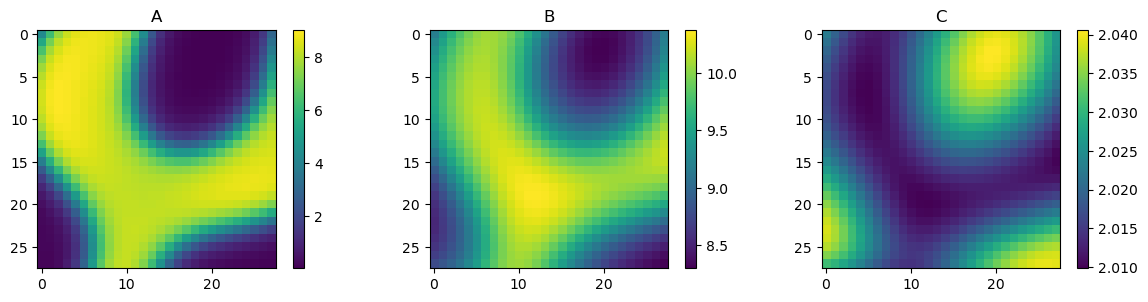

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.030986136231057806 B RMSE:0.0018533403652584443 C RMSE:0.0009737349160039362
F_A actual:0.7584581684204788, F_A:0.7593228220939636, RMSE: 0.02034654014971524
F_B actual:51.95304446995254, F_B:51.7037467956543, RMSE: 0.05392646478116069
F_C actual:1.3526933803595834e-09, F_C:2.2353508200012584e-07, RMSE: 0.0004591585939368489

Laplacian A RMSE: 0.13329502518746983
Laplacian B RMSE: 0.02570094501319772

dAdt RMSE: 0.02022797071321703
dBdt RMSE: 0.06107456349370239
dCdt RMSE: 0.0004591585939368489


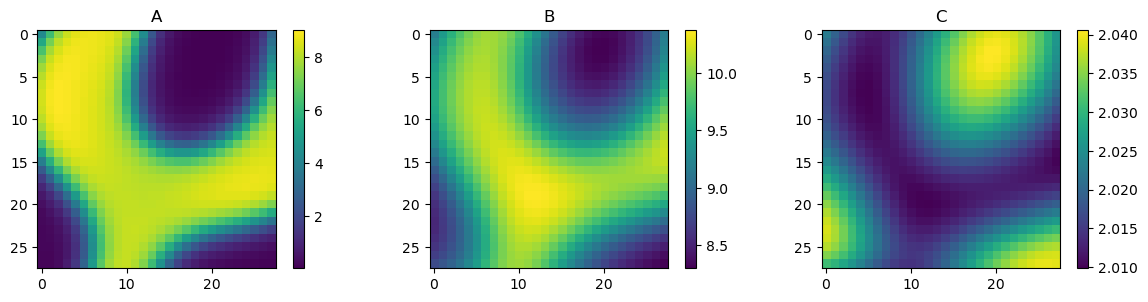

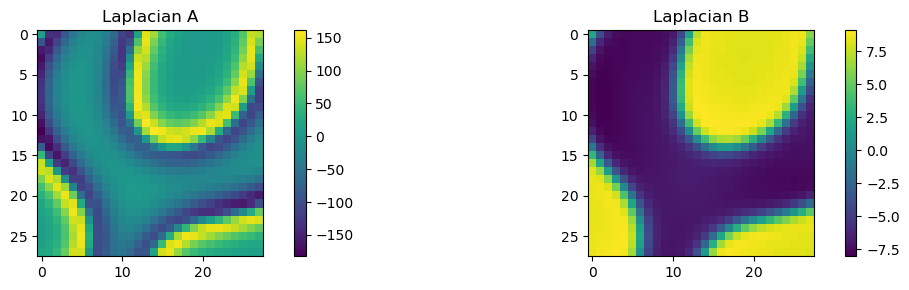

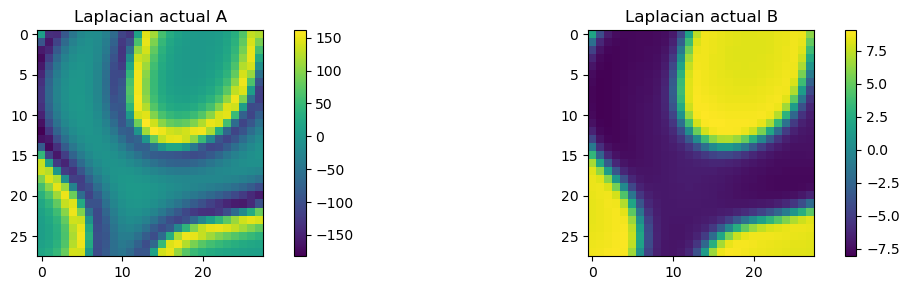

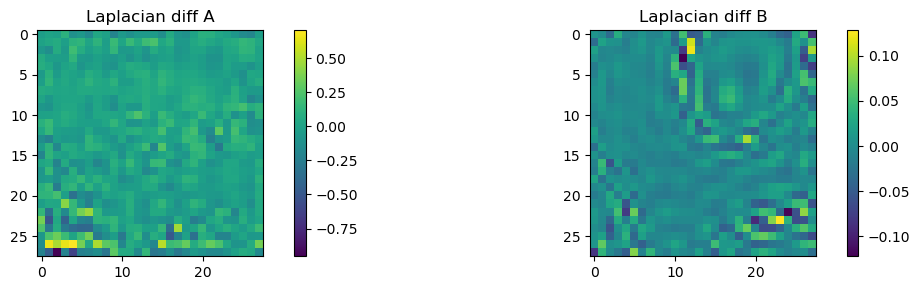

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

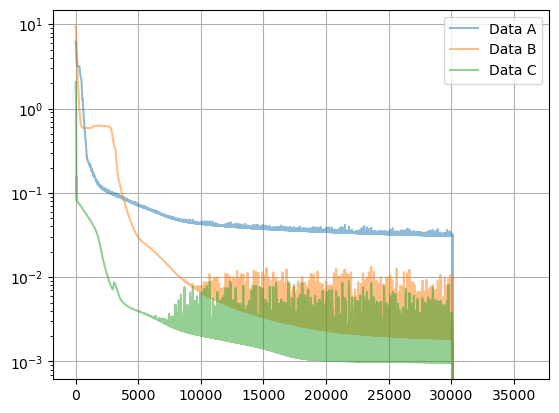

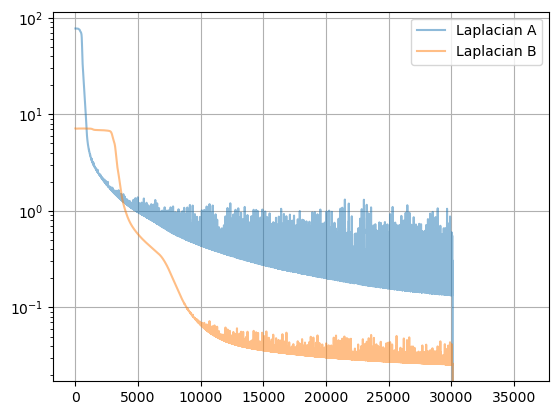

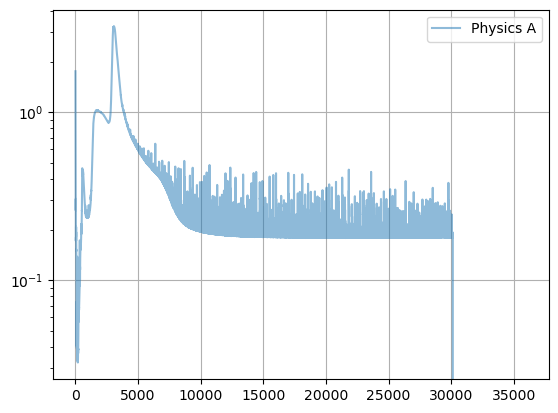

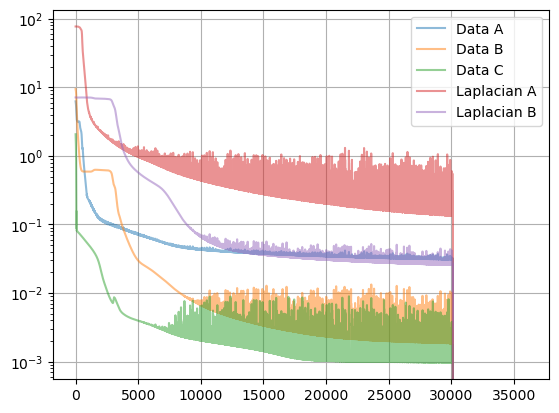

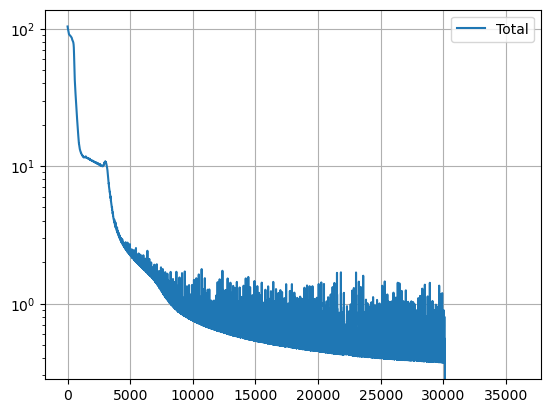

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

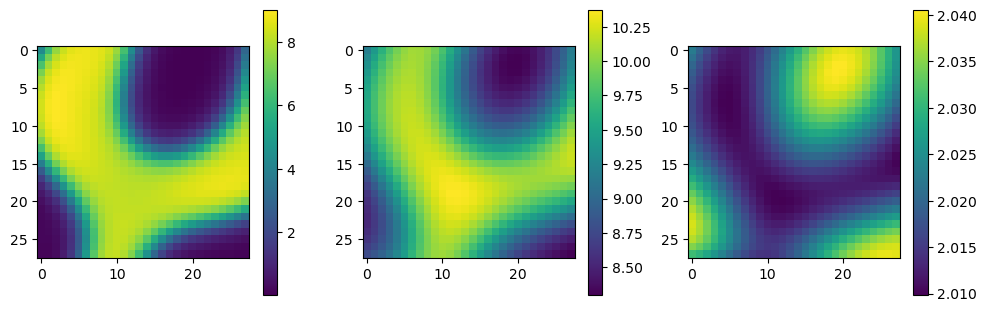

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.030986136231057806
0.0018533403652584443
0.0009737349160039362


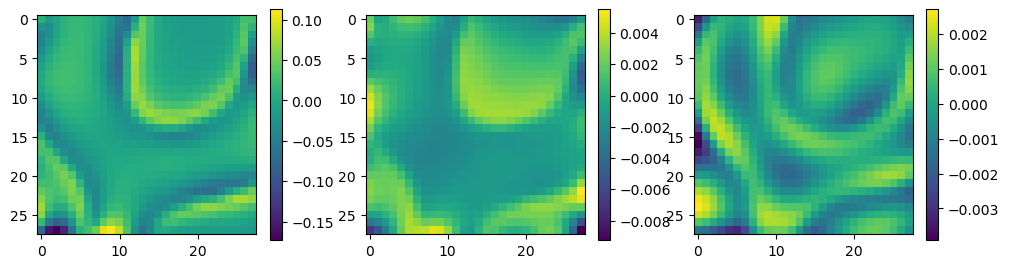

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	0.100		0.000		nan		(nan,nan)
b_C:	1.000		0.880		nan		(nan,nan)
V_A:	20.000		18.542		nan		(nan,nan)
V_B:	20.000		26.911		nan		(nan,nan)
V_C:	100.000		3.653		nan		(nan,nan)
mu_A:	1.000		0.854		nan		(nan,nan)
mu_B:	1.000		0.976		nan		(nan,nan)
K_AA:	5.000		5.067		0.005		(0.005,34.720)
K_AB:	5.000		4.998		0.005		(0.005,34.720)
K_AC:	10.000		26.016		34.720		(0.005,34.720)
K_BA:	10.000		9.672		2.156		(2.156,38.997)
K_BC:	5.000		19.627		2.156		(2.156,38.997)
K_CB:	5.000		2.539		0.535		(0.535,7.678)
K_CC:	10.000		4.534		7.678		(0.535,7.678)


In [4]:
params.mu_C

0.5

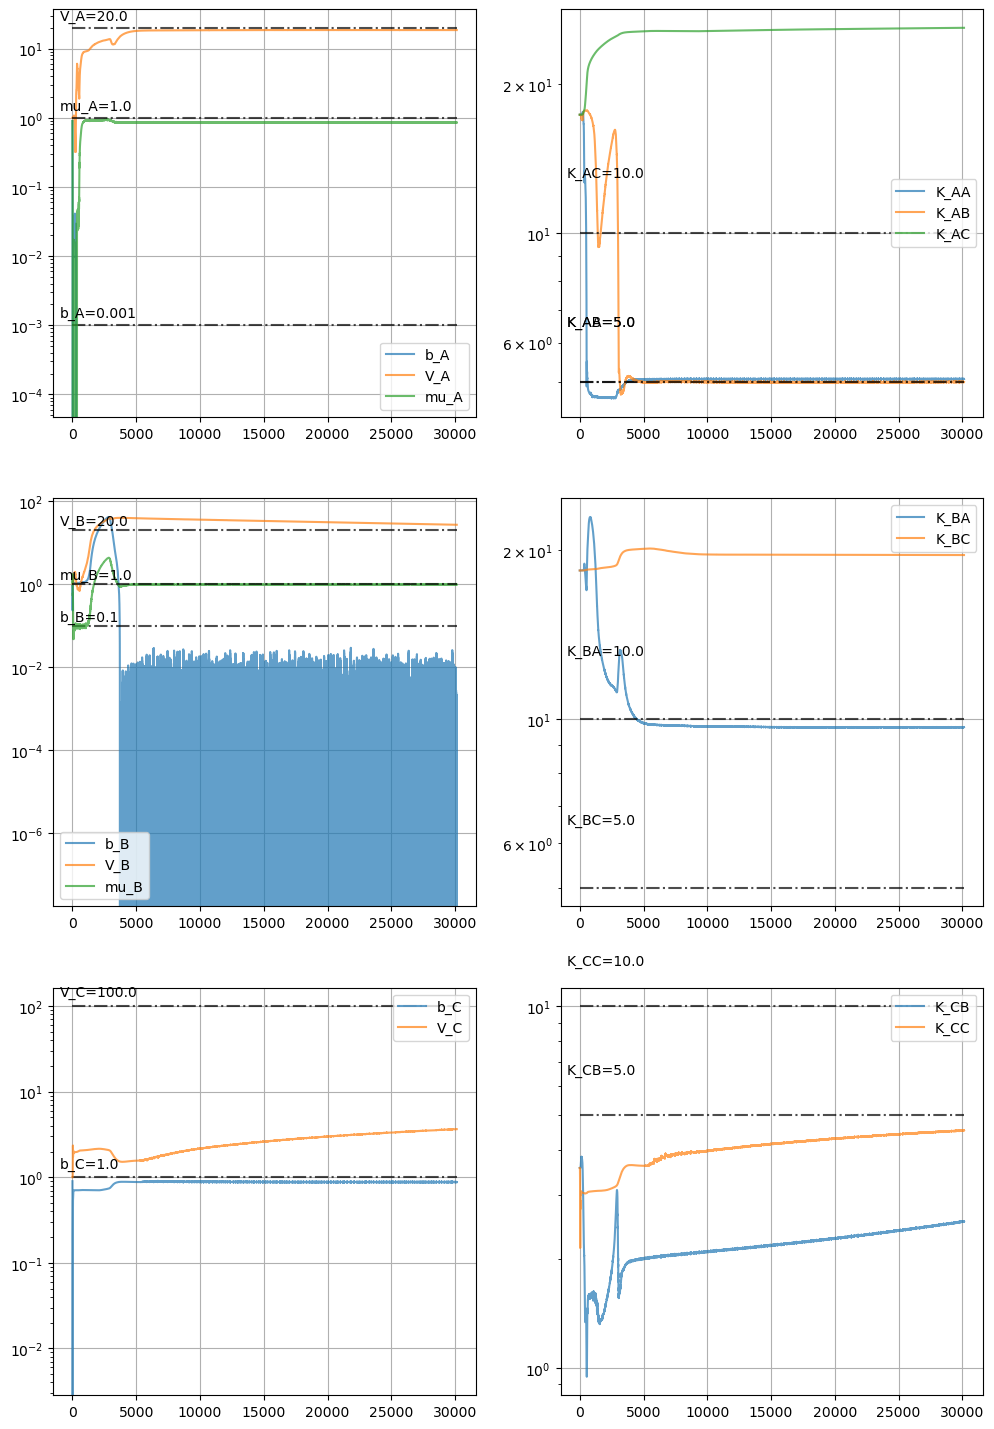

In [18]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [17]:
import pickle

torch.save(model, "./06_outputs/model_PINN_26")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_26")
with open('./06_outputs/model_PINN_params_name_list_26.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_26.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_26.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_26.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [14]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


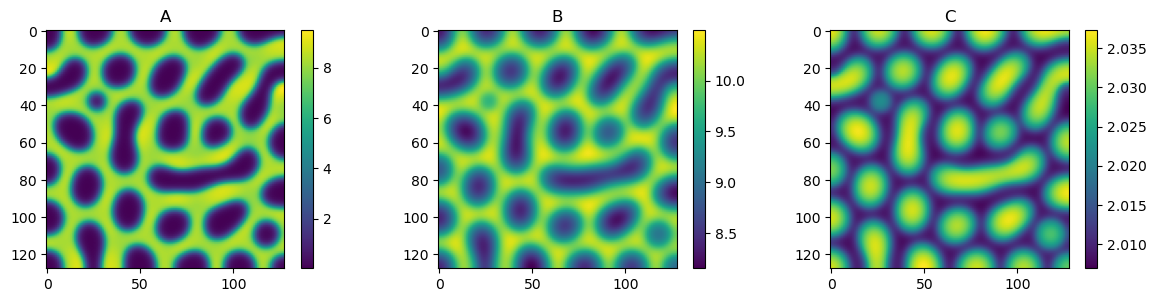

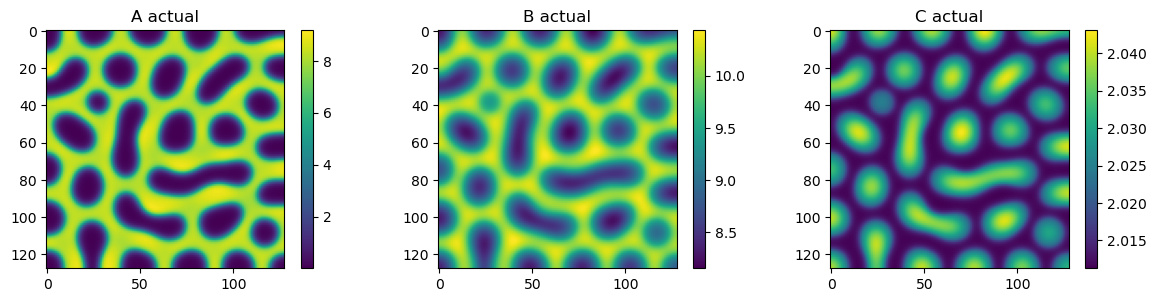

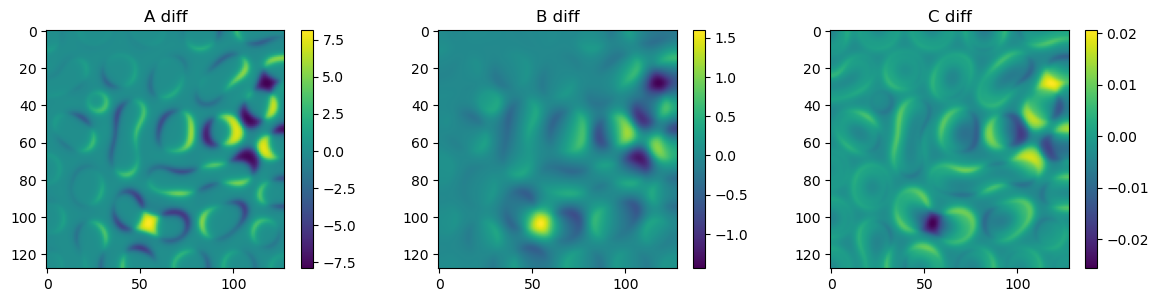

In [15]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}